In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
# creating dataframes
purchase_price = pd.read_csv('2017PurchasePricesDeccsv/2017PurchasePricesDec.csv')
beg_inv = pd.read_csv('BegInvFINAL12312016csv/BegInvFINAL12312016.csv')
end_inv = pd.read_csv('EndInvFINAL12312016csv/EndInvFINAL12312016.csv')
final_purchase = pd.read_csv('PurchasesFINAL12312016csv/PurchasesFINAL12312016.csv')
sales = pd.read_csv('SalesFINAL12312016csv/SalesFINAL12312016.csv')
vendor_invoices = pd.read_csv('VendorInvoices12312016csv/InvoicePurchases12312016.csv')

# Purchase_price table

In [3]:
# Exploring data
purchase_price

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,750mL,750,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,750mL,750,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,750mL,750,1,10.94,7245,PROXIMO SPIRITS INC.
...,...,...,...,...,...,...,...,...,...
12256,44917,Ferreira 10-Yr Tawny Port,24.99,750mL,750,2,16.55,90024,VINILANDIA USA
12257,44944,Sanford Santa Rita Pnt Nr,22.99,750mL,750,2,14.93,4425,MARTIGNETTI COMPANIES
12258,45016,Neal One Lane Bridg Cab Svgn,93.99,750mL,750,2,61.43,10754,PERFECTA WINES
12259,46011,Folonari Pnt Nr Venezie,12.99,1500ml,1500,2,8.90,9744,FREDERICK WILDMAN & SONS


In [4]:
purchase_price.info()       

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           12261 non-null  int64  
 1   Description     12260 non-null  object 
 2   Price           12261 non-null  float64
 3   Size            12260 non-null  object 
 4   Volume          12260 non-null  object 
 5   Classification  12261 non-null  int64  
 6   PurchasePrice   12261 non-null  float64
 7   VendorNumber    12261 non-null  int64  
 8   VendorName      12261 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 862.2+ KB


In [5]:
purchase_price.isnull().sum().sort_values(ascending=True)

Brand             0
Price             0
PurchasePrice     0
Classification    0
VendorNumber      0
VendorName        0
Size              1
Description       1
Volume            1
dtype: int64

In [6]:
# changing column 'Volume' datatype to float and handling missing values
purchase_price['Volume'].unique()

#Have nan and unknown values and is of str dats type

array(['750', '1000', '1750', '50', '375', '100', '200', '300', 'Unknown',
       '250', '1500', '3000', '5000', '4000', '187', '150', '500', '720',
       '650', '330', '18000', '180', '6000', '20', nan, '20000', '162.5',
       '400', '1100', '600', '19500', '560', '3750', '9000'], dtype=object)

In [7]:
# Changing column Volume to float
purchase_price['Volume'] = purchase_price['Volume'].replace('Unknown',np.nan)
purchase_price['Volume'] = purchase_price['Volume'].astype(float)
purchase_price['Volume'].unique()

array([  750. ,  1000. ,  1750. ,    50. ,   375. ,   100. ,   200. ,
         300. ,     nan,   250. ,  1500. ,  3000. ,  5000. ,  4000. ,
         187. ,   150. ,   500. ,   720. ,   650. ,   330. , 18000. ,
         180. ,  6000. ,    20. , 20000. ,   162.5,   400. ,  1100. ,
         600. , 19500. ,   560. ,  3750. ,  9000. ])

In [8]:
purchase_price[purchase_price['Volume']==20000.]

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
8798,23047,From the Tank Red Keg,230.49,20000mL,20000.0,2,149.67,90024,VINILANDIA USA
9406,25463,Eden Dry Cider Keg,227.99,20000mL,20000.0,2,155.10,90047,CRUSH WINES
10508,23491,True Myth Chard Keg,346.99,20000mL,20000.0,2,204.60,90047,CRUSH WINES
11400,25464,Eden Rose Cider Keg,251.49,20000mL,20000.0,2,163.31,90047,CRUSH WINES
12018,26146,Montelvini CabMerlot,221.99,20000mL,20000.0,2,151.01,90011,FORTUNE WINE BROKERS LLC


In [9]:
# filling miising values based on the mean volume within the same price range

# creating price range using quantile based bins
purchase_price['price_range'] = pd.qcut(purchase_price['PurchasePrice'], q=4)

In [10]:
purchase_price

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName,price_range
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750.0,1,9.28,8320,SHAW ROSS INT L IMP LTD,"(6.89, 10.65]"
1,62,Herradura Silver Tequila,36.99,750mL,750.0,1,28.67,1128,BROWN-FORMAN CORP,"(20.13, 11111.03]"
2,63,Herradura Reposado Tequila,38.99,750mL,750.0,1,30.46,1128,BROWN-FORMAN CORP,"(20.13, 11111.03]"
3,72,No. 3 London Dry Gin,34.99,750mL,750.0,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP,"(20.13, 11111.03]"
4,75,Three Olives Tomato Vodka,14.99,750mL,750.0,1,10.94,7245,PROXIMO SPIRITS INC.,"(10.65, 20.13]"
...,...,...,...,...,...,...,...,...,...,...
12256,44917,Ferreira 10-Yr Tawny Port,24.99,750mL,750.0,2,16.55,90024,VINILANDIA USA,"(10.65, 20.13]"
12257,44944,Sanford Santa Rita Pnt Nr,22.99,750mL,750.0,2,14.93,4425,MARTIGNETTI COMPANIES,"(10.65, 20.13]"
12258,45016,Neal One Lane Bridg Cab Svgn,93.99,750mL,750.0,2,61.43,10754,PERFECTA WINES,"(20.13, 11111.03]"
12259,46011,Folonari Pnt Nr Venezie,12.99,1500ml,1500.0,2,8.90,9744,FREDERICK WILDMAN & SONS,"(6.89, 10.65]"


In [11]:
# filling missing values
def fill_volume_by_price_range(row):
    if pd.isna(row['Volume']):
        median_value = purchase_price[purchase_price['price_range']==row['price_range']]['Volume'].median()
        return median_value
    else:
        return row['Volume']

purchase_price['Volume'] = purchase_price.apply(fill_volume_by_price_range, axis = 1)

# dropping temp price range column
purchase_price = purchase_price.drop(columns='price_range')

In [12]:
purchase_price['Volume'].unique()

array([  750. ,  1000. ,  1750. ,    50. ,   375. ,   100. ,   200. ,
         300. ,   250. ,  1500. ,  3000. ,  5000. ,  4000. ,   187. ,
         150. ,   500. ,   720. ,   650. ,   330. , 18000. ,   180. ,
        6000. ,    20. , 20000. ,   162.5,   400. ,  1100. ,   600. ,
       19500. ,   560. ,  3750. ,  9000. ])

In [13]:
# checking Null values
purchase_price.isnull().sum().sort_values(ascending=True)

Brand             0
Price             0
Classification    0
Volume            0
PurchasePrice     0
VendorNumber      0
VendorName        0
Size              1
Description       1
dtype: int64

In [14]:
purchase_price.describe()

,Brand,Price,Volume,Classification,PurchasePrice,VendorNumber
count,12261.000000,12261.000000,12261.000000,12261.000000,12261.000000,12261.000000
mean,17989.067123,38.640240,842.883574,1.708996,26.488220,10814.861757
std,12528.503464,206.151172,679.393638,0.454244,156.182948,19007.682322
min,58.000000,0.000000,20.000000,1.000000,0.000000,2.000000
25%,5990.000000,10.990000,750.000000,1.000000,6.890000,3960.000000
50%,18788.000000,15.990000,750.000000,2.000000,10.650000,7153.000000
75%,25117.000000,29.990000,750.000000,2.000000,20.130000,9552.000000
max,90631.000000,13999.900000,20000.000000,2.000000,11111.030000,173357.000000


In [15]:
# checking Null values
purchase_price[purchase_price.isnull().any(axis=1)]

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
7915,4202,NaN,0.0,NaN,750.0,1,11.19,480,BACARDI USA INC


In [16]:
# checking for any Brand = 4202 in beg_inventory 
beg_inv[beg_inv['Brand']==4202]

#AS there are no brand 4202 in inventory so dropping this value

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate


In [17]:
# Dropping Null values
purchase_price[purchase_price.isnull().any(axis=1)]

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
7915,4202,NaN,0.0,NaN,750.0,1,11.19,480,BACARDI USA INC


In [18]:
# checking for duplicates
purchase_price.duplicated().sum()

np.int64(0)

In [ ]:
# dropping unwanted columns
purchase_price = purchase_price.drop(columns=['LOG_PRICE','LOG_VOLUME','LOG_PURCHASEPRICE'])

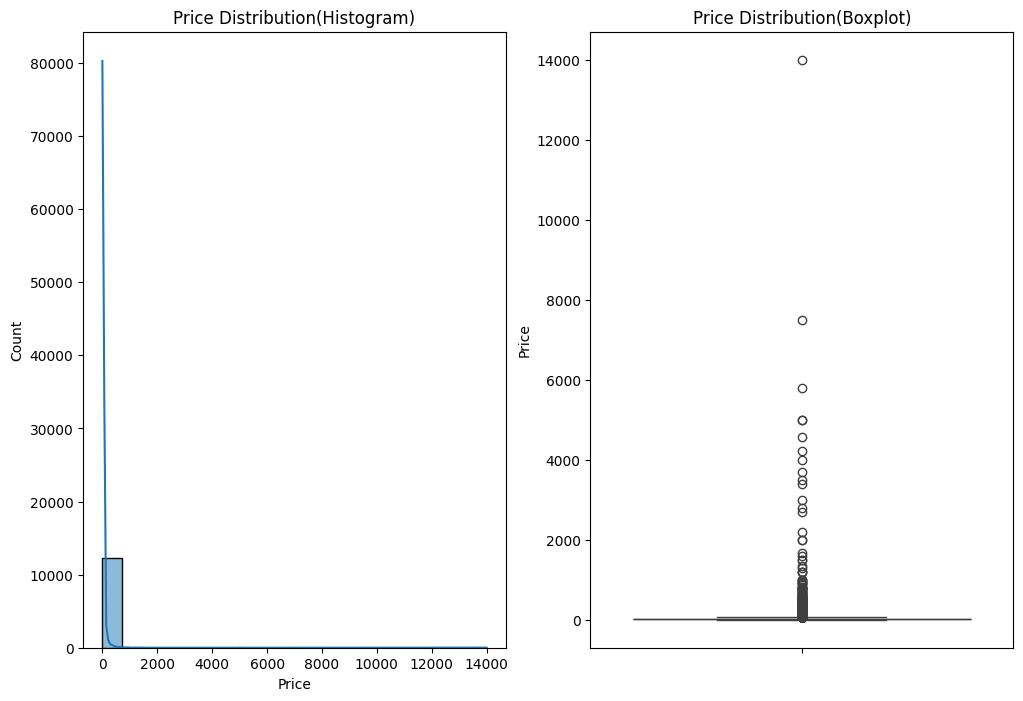

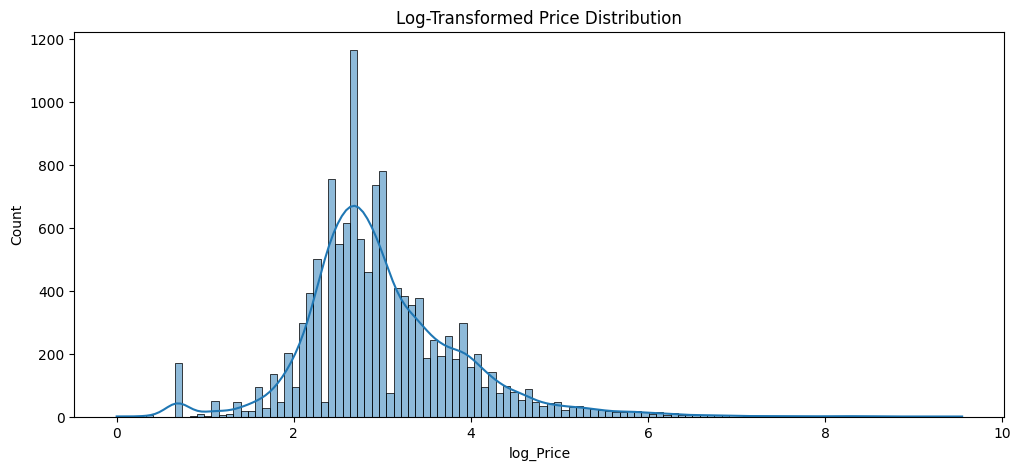

0.25     10.99
0.50     15.99
0.75     29.99
0.95     95.99
0.99    349.99
Name: log_Price, dtype: float64


<Figure size 640x480 with 0 Axes>

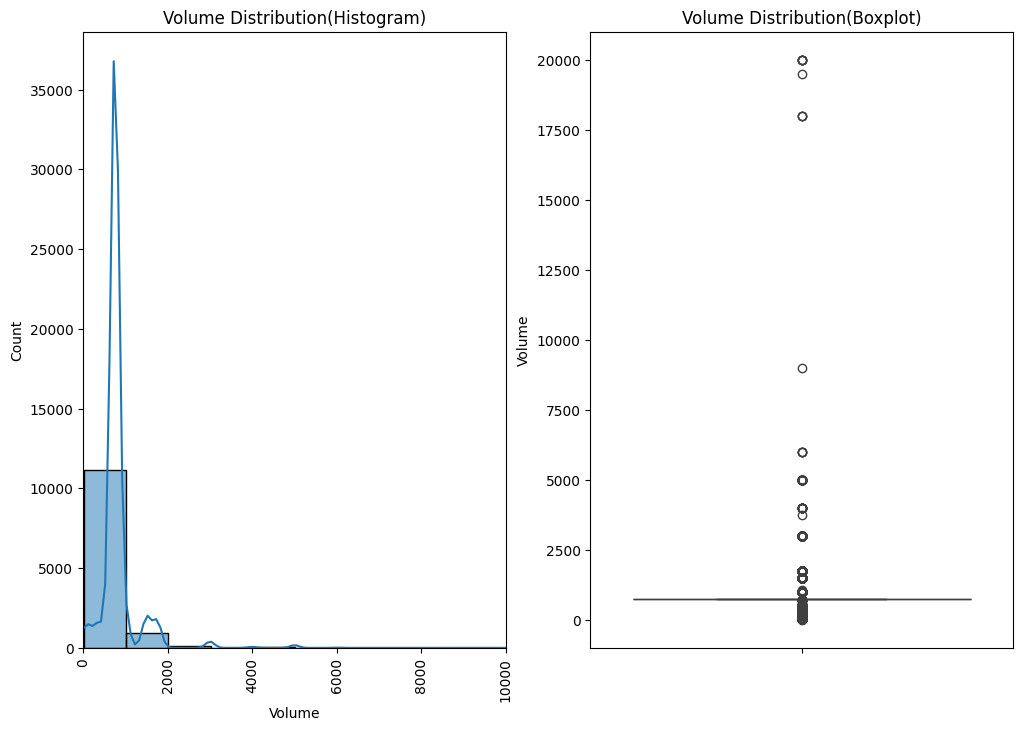

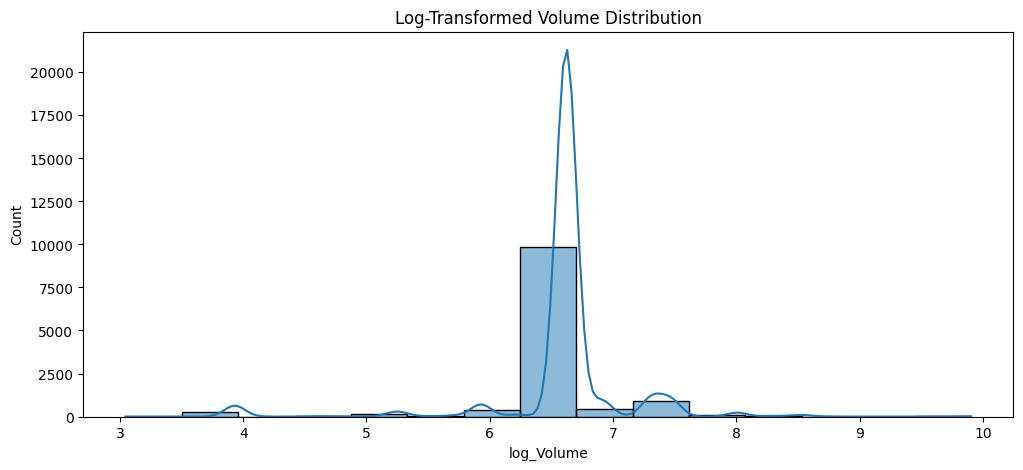

0.25     750.0
0.50     750.0
0.75     750.0
0.95    1500.0
0.99    3000.0
Name: log_Volume, dtype: float64


<Figure size 640x480 with 0 Axes>

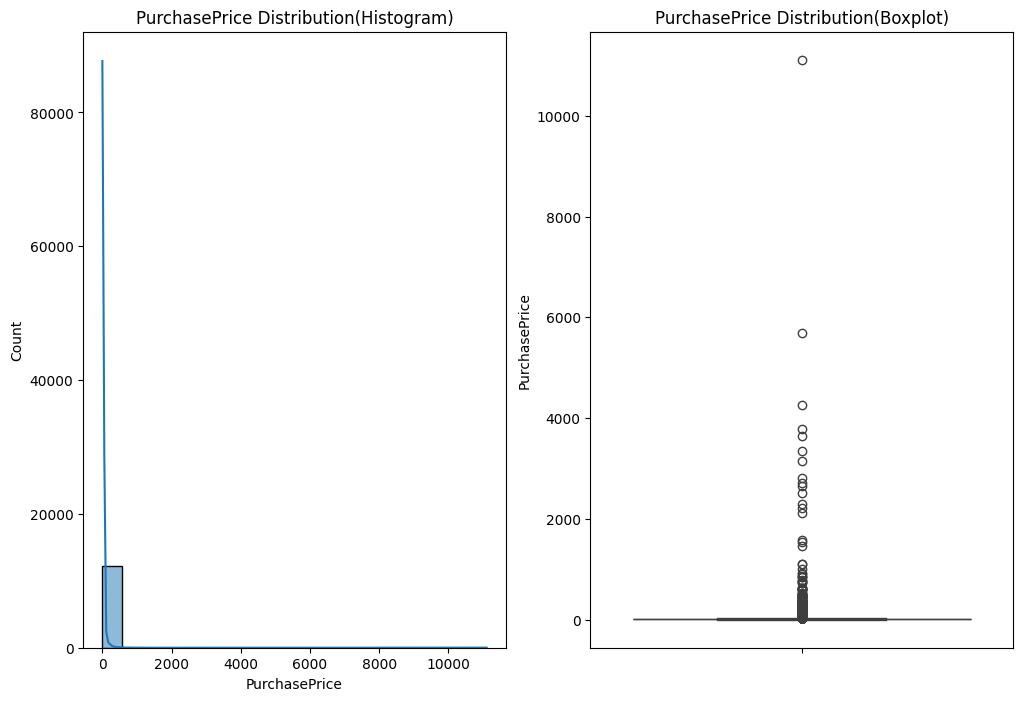

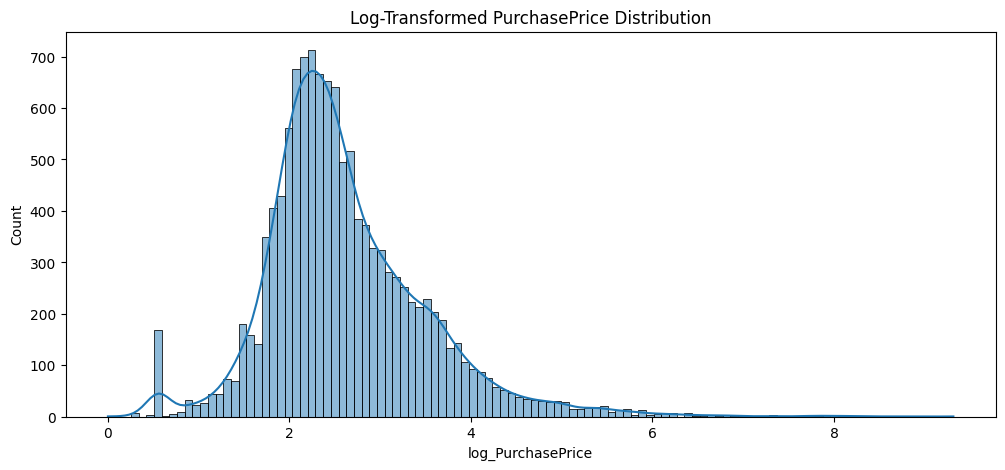

0.25      6.890000
0.50     10.650000
0.75     20.130000
0.95     64.930000
0.99    232.215389
Name: log_PurchasePrice, dtype: float64


<Figure size 640x480 with 0 Axes>

In [19]:
# Data Dsitribution

cont_cols = ['Price','Volume','PurchasePrice']

for col in cont_cols:

    plt.figure(figsize=[12,8])

    # plotting histogram with KDE
    plt.subplot(1,2,1)
    if col=='Volume':
        plt.xlim(0, 10000)
    sb.histplot(purchase_price[col], kde=True, bins=20)
    plt.title(f'{col} Distribution(Histogram)')
    if col=='Volume':
        plt.xticks(rotation=90)

    # plotting Boxplt
    plt.subplot(1,2,2)
    sb.boxplot(purchase_price[col])
    plt.title(f'{col} Distribution(Boxplot)')

    purchase_price[f'log_{col}']= np.log1p(purchase_price[col])

    plt.figure(figsize=(12,5))
    sb.histplot(purchase_price[f'log_{col}'], kde=True)
    plt.title(f'Log-Transformed {col} Distribution')
    plt.show()
    print(np.expm1(purchase_price[f'log_{col}'].quantile([0.25, 0.5, 0.75, 0.95, 0.99])))

    plt.tight_layout()
    plt.show()


Percentile Interpretation (Raw Prices)
Percentile	Price ($)	Interpretation
25% (Q1)	10.99	25% of items are priced below $10.99
50% (Median)	15.99	Half of the items are priced below $15.99
75% (Q3)	29.99	75% are priced below $29.99
95%	95.99	95% are below $95.99 — the remaining 5% are high-priced
99%	349.99	99% are below $349.99 — top 1% are extreme outliers

 Histogram & Boxplot (First Image)
Shows that most prices are under $30, supporting what we see in the percentiles up to the 75th.

The boxplot's whiskers likely end around $95.99, and everything beyond that (top 5%) appears as outliers — confirming the many dots above the whiskers.

That 1% of items priced over $349.99 are inflating the histogram’s right tail and dominating the scale — making lower prices hard to see.

2. Log Histogram (Second Image)
By applying log10(price), those high values (like 349.99+) are compressed and fall within a much narrower range.

This lets you see more detail in the majority range (under $30), which dominates the data.
                                                 

# Beg inventory

In [20]:
beg_inv.head()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2016-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2016-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2016-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2016-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2016-01-01


In [21]:
beg_inv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206529 entries, 0 to 206528
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InventoryId  206529 non-null  object 
 1   Store        206529 non-null  int64  
 2   City         206529 non-null  object 
 3   Brand        206529 non-null  int64  
 4   Description  206529 non-null  object 
 5   Size         206529 non-null  object 
 6   onHand       206529 non-null  int64  
 7   Price        206529 non-null  float64
 8   startDate    206529 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 14.2+ MB


In [22]:
# checking Null values
beg_inv.isnull().sum().sort_values(ascending=True)

InventoryId    0
Store          0
City           0
Brand          0
Description    0
Size           0
onHand         0
Price          0
startDate      0
dtype: int64

In [23]:
# checking duplicate values
beg_inv.duplicated().sum()

np.int64(0)

In [24]:
# Total Inventory Count
print(beg_inv['onHand'].sum())

4219275


In [25]:
beg_inv['Size'].unique()

array(['750mL', 'Liter', '1.75L', '50mL', '375mL', '50mL 4 Pk',
       '375mL 2 Pk', '750mL 3 Pk', '375mL 3 Pk', '750mL + 3/',
       '200mL 3 Pk', '50mL 3 Pk', '100mL 4 Pk', '100mL', '50mL 5 Pk',
       '200mL 4 Pk', '250mL 4 Pk', '750mL 2 Pk', '200mL', '3/100mL',
       '1.5L', '5L', '4L', '187mL 4 Pk', '3L', '5.0 Oz', '187mL', '500mL',
       '187mL 3 Pk', '300mL', '50mL 12 Pk', '330mL', '250mL', '18L',
       '750mL + 2/', '180mL', '720mL', '22.0 Oz', '6L', '20L',
       '750mL + 4/'], dtype=object)

In [26]:
# foratting 'Size' Column
beg_inv['Size'] = beg_inv['Size'].replace('Liter','1L')
beg_inv['Size'] = beg_inv['Size'].replace('750mL + 3/','750mL 3 Pk')
beg_inv['Size'] = beg_inv['Size'].replace('750mL + 2/','750mL 2 Pk')
beg_inv['Size'] = beg_inv['Size'].replace('3/100mL','100mL 3 Pk')
beg_inv['Size'] = beg_inv['Size'].replace('750mL + 1/','750mL')
beg_inv['Size'] = beg_inv['Size'].replace('750mL + 4/','750mL 4 Pk')


In [27]:
beg_inv['Size'].unique()

array(['750mL', '1L', '1.75L', '50mL', '375mL', '50mL 4 Pk', '375mL 2 Pk',
       '750mL 3 Pk', '375mL 3 Pk', '200mL 3 Pk', '50mL 3 Pk',
       '100mL 4 Pk', '100mL', '50mL 5 Pk', '200mL 4 Pk', '250mL 4 Pk',
       '750mL 2 Pk', '200mL', '100mL 3 Pk', '1.5L', '5L', '4L',
       '187mL 4 Pk', '3L', '5.0 Oz', '187mL', '500mL', '187mL 3 Pk',
       '300mL', '50mL 12 Pk', '330mL', '250mL', '18L', '180mL', '720mL',
       '22.0 Oz', '6L', '20L', '750mL 4 Pk'], dtype=object)

In [28]:
# creating new column pack quantity

beg_inv['pack_count'] = beg_inv['Size'].str.extract(r'(\d+)\s*Pk')  # get number before "Pk"
beg_inv['pack_count'] = beg_inv['pack_count'].fillna(1).astype(int)

In [110]:
beg_inv = beg_inv.drop(columns='PACK_COUNT')

# End Inventory

In [29]:
end_inv.head()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2016-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7,36.99,2016-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,7,38.99,2016-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,4,34.99,2016-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,7,14.99,2016-12-31


In [30]:
end_inv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224489 entries, 0 to 224488
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InventoryId  224489 non-null  object 
 1   Store        224489 non-null  int64  
 2   City         223205 non-null  object 
 3   Brand        224489 non-null  int64  
 4   Description  224489 non-null  object 
 5   Size         224489 non-null  object 
 6   onHand       224489 non-null  int64  
 7   Price        224489 non-null  float64
 8   endDate      224489 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 15.4+ MB


In [31]:
# checking Null values
end_inv.isnull().sum().sort_values(ascending=True)

InventoryId       0
Store             0
Brand             0
Description       0
onHand            0
Size              0
Price             0
endDate           0
City           1284
dtype: int64

Handling Null Values

In [32]:
end_inv[end_inv.isnull().any(axis=1)]

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
113895,46__58,46,NaN,58,Gekkeikan Black & Gold Sake,750mL,0,12.99,2016-12-31
113896,46__62,46,NaN,62,Herradura Silver Tequila,750mL,0,36.99,2016-12-31
113897,46__63,46,NaN,63,Herradura Reposado Tequila,750mL,0,38.99,2016-12-31
113898,46__77,46,NaN,77,Three Olives Espresso Vodka,750mL,0,14.99,2016-12-31
113899,46__106,46,NaN,106,Mr Boston Peach Schnapps,Liter,0,4.49,2016-12-31
...,...,...,...,...,...,...,...,...,...
115174,46__46447,46,NaN,46447,Gascon Malbec Mendoza,750mL,0,10.99,2016-12-31
115175,46__46458,46,NaN,46458,Layer Cake Barosa Shiraz,750mL,0,15.99,2016-12-31
115176,46__46476,46,NaN,46476,Tilia Malbec Mendoza,750mL,0,9.99,2016-12-31
115177,46__46764,46,NaN,46764,Clayhouse Adobe Red Paso Rbl,750mL,0,11.99,2016-12-31


In [33]:
# Correcting Inventory_id
def fill_nan_city_Inventoryid(row):
    if pd.isna(row['City']):
        
        city_val = beg_inv.loc[beg_inv['Store']==row['Store'],'City']

        if not city_val.empty:
            city_val = city_val.values[0]
        else:
            city_val = np.nan

        # concatenating inventoryId as string (store_city_brand)
        InventoryId = str(row['Store']) + '_' + str(city_val) + '_' + str(row['Brand'])

        return InventoryId
    else:
        return row['InventoryId']
    
end_inv['InventoryId'] = end_inv.apply(fill_nan_city_Inventoryid,axis=1)

In [34]:
# Imputing Missing values in 'City' column from beg_inv based on 'Store'
def fill_nan_city(row):
    if pd.isna(row['City']):
        
        city = beg_inv[beg_inv['Store']==row['Store']]['City'].values[0]

        return city
    else:
        return row['City']
    
end_inv['City'] = end_inv.apply(fill_nan_city,axis=1)

In [35]:
# checking Null values
end_inv[['City']].isnull().sum().sort_values(ascending=True)


City    0
dtype: int64

In [36]:

# verifying filled missing values
end_inv[end_inv['Store']==46]

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
113895,46_TYWARDREATH_58,46,TYWARDREATH,58,Gekkeikan Black & Gold Sake,750mL,0,12.99,2016-12-31
113896,46_TYWARDREATH_62,46,TYWARDREATH,62,Herradura Silver Tequila,750mL,0,36.99,2016-12-31
113897,46_TYWARDREATH_63,46,TYWARDREATH,63,Herradura Reposado Tequila,750mL,0,38.99,2016-12-31
113898,46_TYWARDREATH_77,46,TYWARDREATH,77,Three Olives Espresso Vodka,750mL,0,14.99,2016-12-31
113899,46_TYWARDREATH_106,46,TYWARDREATH,106,Mr Boston Peach Schnapps,Liter,0,4.49,2016-12-31
...,...,...,...,...,...,...,...,...,...
115174,46_TYWARDREATH_46447,46,TYWARDREATH,46447,Gascon Malbec Mendoza,750mL,0,10.99,2016-12-31
115175,46_TYWARDREATH_46458,46,TYWARDREATH,46458,Layer Cake Barosa Shiraz,750mL,0,15.99,2016-12-31
115176,46_TYWARDREATH_46476,46,TYWARDREATH,46476,Tilia Malbec Mendoza,750mL,0,9.99,2016-12-31
115177,46_TYWARDREATH_46764,46,TYWARDREATH,46764,Clayhouse Adobe Red Paso Rbl,750mL,0,11.99,2016-12-31


In [37]:
end_inv['Size'].unique()

array(['750mL', 'Liter', '750mL + 2/', '1.75L', '50mL', '375mL',
       '50mL 4 Pk', '200mL 3 Pk', '50mL 3 Pk', '750mL + 3/', '375mL 2 Pk',
       '100mL 4 Pk', '250mL', '100mL', '50mL 5 Pk', '3/100mL',
       '200mL 4 Pk', '250mL 4 Pk', '200mL', '1.5L', '5L', '4L',
       '187mL 4 Pk', '3L', '5.0 Oz', '187mL 3 Pk', '187mL', '500mL',
       '750mL 3 Pk', '400mL', '300mL', '330mL', '18L', '750mL 2 Pk',
       '5/2 oz', '720mL', '375mL 3 Pk', '750mL + 1/', '180mL',
       '200mL 5 Pk', '6L', '187mL 2 Pk', '750mL 4 Pk', '750mL 6 Pk',
       '750mL + 4/', '25.0', '128.0 Gal'], dtype=object)

In [38]:
# foratting 'Size' Column
end_inv['Size'] = end_inv['Size'].replace('Liter','1L')
end_inv['Size'] = end_inv['Size'].replace('750mL + 3/','750mL 3 Pk')
end_inv['Size'] = end_inv['Size'].replace('750mL + 2/','750mL 2 Pk')
end_inv['Size'] = end_inv['Size'].replace('3/100mL','100mL 3 Pk')
end_inv['Size'] = end_inv['Size'].replace('750mL + 1/','750mL')
end_inv['Size'] = end_inv['Size'].replace('750mL + 4/','750mL 4 Pk')


In [39]:
# creating new column pack quantity

end_inv['pack_count'] = end_inv['Size'].str.extract(r'(\d+)\s*Pk')  # get number before "Pk"
end_inv['pack_count'] = end_inv['pack_count'].fillna(1).astype(int)

In [40]:
# Checking Duplicate entries
end_inv.duplicated().sum()

np.int64(0)

In [41]:
# end inventory count
print(end_inv['onHand'].sum())

4885776


# Final Purchase

In [42]:
final_purchase.head()

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,2016-01-04,2016-02-16,35.71,6,214.26,1
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,4,37.40,1
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-02,2016-01-07,2016-02-21,9.41,5,47.05,1
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,6,56.10,1
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2015-12-24,2016-01-02,2016-01-09,2016-02-16,21.32,5,106.60,1


In [43]:
final_purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372474 entries, 0 to 2372473
Data columns (total 16 columns):
 #   Column          Dtype  
---  ------          -----  
 0   InventoryId     object 
 1   Store           int64  
 2   Brand           int64  
 3   Description     object 
 4   Size            object 
 5   VendorNumber    int64  
 6   VendorName      object 
 7   PONumber        int64  
 8   PODate          object 
 9   ReceivingDate   object 
 10  InvoiceDate     object 
 11  PayDate         object 
 12  PurchasePrice   float64
 13  Quantity        int64  
 14  Dollars         float64
 15  Classification  int64  
dtypes: float64(2), int64(6), object(8)
memory usage: 289.6+ MB


In [44]:
# checking Null Values
final_purchase.isnull().sum().sort_values(ascending=True)

InventoryId       0
Store             0
Brand             0
Description       0
VendorNumber      0
VendorName        0
PONumber          0
PODate            0
PurchasePrice     0
ReceivingDate     0
InvoiceDate       0
PayDate           0
Dollars           0
Quantity          0
Classification    0
Size              3
dtype: int64

Handling Null values

In [45]:
final_purchase[final_purchase.isnull().any(axis=1)]

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
1109668,34_PITMERDEN_3121,34,3121,Pinnacle Rainbow Sherbet,NaN,12546,JIM BEAM BRANDS COMPANY,10938,2016-06-27,2016-07-04,2016-07-13,2016-08-16,6.93,7,48.51,1
1112426,34_PITMERDEN_5678,34,5678,Skinnygirl Pina Colada,NaN,12546,JIM BEAM BRANDS COMPANY,10938,2016-06-27,2016-07-09,2016-07-13,2016-08-16,6.93,6,41.58,1
1116302,39_EASTHALLOW_15365,39,15365,Alabaster 07 Tinta de Toro,NaN,9552,M S WALKER INC,10972,2016-06-29,2016-07-07,2016-07-13,2016-08-21,91.83,1,91.83,2


In [46]:
# Imputing 'Size' Null values from other tables

def fill_nan_size(row):
    
    if pd.isna(row['Size']):
        size = purchase_price[(purchase_price['Brand'] == row['Brand']) & (purchase_price['Description'] == row['Description']) & (purchase_price['PurchasePrice'] == row['PurchasePrice'])]['Size'].values[0]

        return size
    else:
        return row['Size']
    
final_purchase['Size'] = final_purchase.apply(fill_nan_size, axis=1)

In [47]:
final_purchase[['Size']].isnull().sum()

Size    0
dtype: int64

In [48]:
final_purchase.iloc[1109668]

InventoryId                 34_PITMERDEN_3121
Store                                      34
Brand                                    3121
Description          Pinnacle Rainbow Sherbet
Size                                    750mL
VendorNumber                            12546
VendorName        JIM BEAM BRANDS COMPANY    
PONumber                                10938
PODate                             2016-06-27
ReceivingDate                      2016-07-04
InvoiceDate                        2016-07-13
PayDate                            2016-08-16
PurchasePrice                            6.93
Quantity                                    7
Dollars                                 48.51
Classification                              1
Name: 1109668, dtype: object

## Sales

In [49]:
sales.head()

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2016-01-01,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,2016-01-02,750.0,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2016-01-03,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,2016-01-08,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,2016-01-09,375.0,1,0.79,12546,JIM BEAM BRANDS COMPANY


In [50]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12825363 entries, 0 to 12825362
Data columns (total 14 columns):
 #   Column          Dtype  
---  ------          -----  
 0   InventoryId     object 
 1   Store           int64  
 2   Brand           int64  
 3   Description     object 
 4   Size            object 
 5   SalesQuantity   int64  
 6   SalesDollars    float64
 7   SalesPrice      float64
 8   SalesDate       object 
 9   Volume          float64
 10  Classification  int64  
 11  ExciseTax       float64
 12  VendorNo        int64  
 13  VendorName      object 
dtypes: float64(4), int64(5), object(5)
memory usage: 1.3+ GB


In [51]:
sales.isnull().sum().sort_values(ascending=True)

InventoryId       0
Store             0
Brand             0
Description       0
Size              0
SalesQuantity     0
SalesDollars      0
SalesPrice        0
SalesDate         0
Volume            0
Classification    0
ExciseTax         0
VendorNo          0
VendorName        0
dtype: int64

In [52]:
sales.duplicated().sum()

np.int64(0)

In [56]:
sales['Size'].unique()

array(['750mL', '375mL 2 Pk', '50mL 4 Pk', '750mL 3 Pk', '375mL 3 Pk',
       '200mL 3 Pk', '1.5L', '5L', '1L', '50mL 3 Pk', '100mL 4 Pk',
       '1.75L', '3L', '375mL', '50mL', '100mL', '50mL 5 Pk', '187mL',
       '500mL', '187mL 4 Pk', '250mL 4 Pk', '750mL 2 Pk', '200mL',
       '100mL 3 Pk', '200mL 4 Pk', '4L', '5.0 Oz', '187mL 3 Pk', '300mL',
       '720mL', '50mL 12 Pk', '330mL', '250mL', '22.0 Oz', '180mL', '18L',
       '750mL 4 Pk', '20L', '200mL 5 Pk', '5/2 oz', '6L', '400mL', '25.0',
       '19.5L', '187mL 2 Pk', '25', '9L'], dtype=object)

In [55]:
# foratting 'Size' Column
sales['Size'] = sales['Size'].replace('Liter','1L')
sales['Size'] = sales['Size'].replace('750mL + 3/','750mL 3 Pk')
sales['Size'] = sales['Size'].replace('750mL + 2/','750mL 2 Pk')
sales['Size'] = sales['Size'].replace('3/100mL','100mL 3 Pk')
sales['Size'] = sales['Size'].replace('750mL + 1/','750mL')
sales['Size'] = sales['Size'].replace('750mL + 4/','750mL 4 Pk')

Vendor Invoices

In [61]:
vendor_invoices.head()

,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,105,ALTAMAR BRANDS LLC,2016-01-04,8124,2015-12-21,2016-02-16,6,214.26,3.47,NaN
1,4466,AMERICAN VINTAGE BEVERAGE,2016-01-07,8137,2015-12-22,2016-02-21,15,140.55,8.57,NaN
2,388,ATLANTIC IMPORTING COMPANY,2016-01-09,8169,2015-12-24,2016-02-16,5,106.60,4.61,NaN
3,480,BACARDI USA INC,2016-01-12,8106,2015-12-20,2016-02-05,10100,137483.78,2935.20,NaN
4,516,BANFI PRODUCTS CORP,2016-01-07,8170,2015-12-24,2016-02-12,1935,15527.25,429.20,NaN


In [62]:
vendor_invoices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5543 entries, 0 to 5542
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   VendorNumber  5543 non-null   int64  
 1   VendorName    5543 non-null   object 
 2   InvoiceDate   5543 non-null   object 
 3   PONumber      5543 non-null   int64  
 4   PODate        5543 non-null   object 
 5   PayDate       5543 non-null   object 
 6   Quantity      5543 non-null   int64  
 7   Dollars       5543 non-null   float64
 8   Freight       5543 non-null   float64
 9   Approval      374 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 433.2+ KB


In [82]:
# changing all date columns to datetime
sales['SalesDate'] = pd.to_datetime(sales['SalesDate'])
beg_inv['startDate'] = pd.to_datetime(beg_inv['startDate'])
end_inv['endDate'] = pd.to_datetime(end_inv['endDate'])
final_purchase['PODate'] = pd.to_datetime(final_purchase['PODate'])
final_purchase['ReceivingDate'] = pd.to_datetime(final_purchase['ReceivingDate'])
final_purchase['InvoiceDate'] = pd.to_datetime(final_purchase['InvoiceDate'])
final_purchase['PayDate'] = pd.to_datetime(final_purchase['PayDate'])
vendor_invoices['InvoiceDate'] = pd.to_datetime(vendor_invoices['InvoiceDate'])
vendor_invoices['PODate'] = pd.to_datetime(vendor_invoices['PODate'])
vendor_invoices['PayDate'] = pd.to_datetime(vendor_invoices['PayDate'])

In [100]:
purchase_price.columns = [c.upper() for c in purchase_price.columns]
beg_inv.columns = [c.upper() for c in beg_inv.columns]
end_inv.columns = [c.upper() for c in end_inv.columns]
final_purchase.columns = [c.upper() for c in final_purchase.columns]
sales.columns = [c.upper() for c in sales.columns]
vendor_invoices.columns = [c.upper() for c in vendor_invoices.columns]

####  Uploading data to Snowflake

In [ ]:
from sqlalchemy import create_engine
from snowflake.sqlalchemy import URL

engine = create_engine(URL(
    user='xxxxxx',
    password='xxxxxxx',
    account='xxxxxxx',
    warehouse='xxxxxx',
    database='xxxxxx',
    schema='xxxxxx'
))

In [ ]:
# Upload all cleaned DataFrames
purchase_price.to_sql('PURCHASE_PRICE', con=engine, if_exists='append', index=False)
beg_inv.to_sql('BEG_INV', con=engine, if_exists='append', index=False, chunksize=10000)
end_inv.to_sql('END_INV', con=engine, if_exists='append', index=False, chunksize=10000)
final_purchase.to_sql('FINAL_PURCHASE', con=engine, if_exists='append', index=False, chunksize=10000)
sales.to_sql('SALES', con=engine, if_exists='append', index=False, chunksize=10000)
vendor_invoices.to_sql('VENDOR_INVOICES', con=engine, if_exists='append', index=False, chunksize=10000)


C:\Users\14379\AppData\Local\Temp\ipykernel_3056\2221202118.py:4: UserWarning: The provided table name 'END_INV' is not found exactly as such in the database after writing the table, possibly due to case sensitivity issues. Consider using lower case table names.
  end_inv.to_sql('END_INV', con=engine, if_exists='append', index=False, chunksize=10000)
C:\Users\14379\AppData\Local\Temp\ipykernel_3056\2221202118.py:5: UserWarning: The provided table name 'FINAL_PURCHASE' is not found exactly as such in the database after writing the table, possibly due to case sensitivity issues. Consider using lower case table names.
  final_purchase.to_sql('FINAL_PURCHASE', con=engine, if_exists='append', index=False, chunksize=10000)
C:\Users\14379\AppData\Local\Temp\ipykernel_3056\2221202118.py:6: UserWarning: The provided table name 'SALES' is not found exactly as such in the database after writing the table, possibly due to case sensitivity issues. Consider using lower case table names.
  sales.to_s

12